In [1]:
import subprocess
import sys

def install_if_needed(package):
    try:
        #Check if the package is already installed
        subprocess.run([sys.executable, '-m', 'pip', 'show', package], check=True, stdout=subprocess.DEVNULL)
    except subprocess.CalledProcessError:
        #If not installed, install the package
        subprocess.run([sys.executable, '-m', 'pip', 'install', package, '--user'], check=True)

required_packages = [
    'scipy<1.10.0,>=1.6.0',
    'urllib3<2.0',
    'matplotlib',
    'numpy<1.23',
    'tensorflow<2.16'
]

for package in required_packages:
    install_if_needed(package)
!pip install --upgrade pip


[notice] A new release of pip is available: 23.3.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip



[notice] A new release of pip is available: 23.3.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip



[notice] A new release of pip is available: 23.3.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


  Using cached numpy-1.26.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.2 MB)


  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scipy 1.9.3 requires numpy<1.26.0,>=1.18.5, but you have numpy 1.26.4 which is incompatible.

[notice] A new release of pip is available: 23.3.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 24.0 MB/s eta 0:00:0000:01

[notice] A new release of pip is available: 23.3.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [2]:
import tensorflow as tf
print(tf.__version__)
import matplotlib

2024-12-02 13:58:21.376685: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-02 13:58:22.453653: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-02 13:58:23.276108: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-02 13:58:23.276188: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-02 13:58:23.294478: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

2.15.1


### compileddayarr -> xarr, height -> yarr

In [4]:
import numpy as np
import matplotlib.pyplot as plt

data = np.genfromtxt("ASTR19_F24_group_project_data.txt",dtype=[('day','i8'),('time','S5'),('height','f8')])
x = np.linspace(0,42,1000)

day = []
time = []
yarr = []

for i in range(82):
    day.append(data[i][0])
    time.append(data[i][1].decode("utf-8"))
    yarr.append(data[i][2])


(82,)
[1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8, 8, 9, 9, 10, 10, 11, 11, 12, 12, 13, 13, 14, 14, 15, 15, 16, 16, 17, 17, 18, 18, 19, 19, 20, 20, 21, 21, 22, 22, 23, 23, 24, 24, 25, 25, 26, 26, 27, 27, 28, 28, 29, 29, 30, 30, 31, 31, 32, 32, 33, 33, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41]
 
['8:07', '15:37', '8:55', '16:25', '9:45', '17:14', '10:35', '18:00', '11:28', '18:46', '12:22', '19:31', '13:24', '20:16', '3:22', '21:01', '4:07', '21:46', '4:50', '11:58', '5:31', '12:56', '6:08', '13:45', '6:47', '14:25', '7:22', '15:00', '7:59', '15:34', '8:34', '16:08', '9:10', '16:41', '9:45', '17:12', '10:21', '17:45', '10:57', '18:15', '11:38', '18:48', '12:25', '19:20', '2:22', '19:52', '2:58', '20:30', '3:37', '10:44', '4:23', '11:55', '5:15', '12:57', '6:09', '13:50', '7:05', '14:39', '7:58', '15:27', '8:50', '16:10', '9:40', '16:52', '10:30', '17:34', '11:19', '18:12', '12:10', '18:49', '1:32', '19:24', '2:13', '20:00', '2:54', '9:54', '3:39', '11:15', '4:29',

In [5]:
##Create an Array to compile the completed list of times
xarr = []
    
for i in range(82):
    minutes = time[i] 
    floatminutes = float(minutes[-2:])
    minuteconversion = floatminutes / 60
    ##Takes the minutes and converts them to hours by dividing by 60

    floathours = float(minutes[:minutes.index(":")])
    hourconversion = (floathours + minuteconversion)/24
    ##Takes the hours, adds them to the converted minute-hours, and divides by 24 to convert to days
    
    compiledday = day[i] + hourconversion
    ##Adds the days to the times
    
    ##print(f'{day[i]} day(s) and {hourconversion*24} hours, or {compiledday} days.')
    
    xarr.append(compiledday)
    ##Appends the total times to the array


[1.3381944444444445, 1.6506944444444445, 2.3715277777777777, 2.6840277777777777, 3.40625, 3.7180555555555554, 4.440972222222222, 4.75, 5.477777777777778, 5.781944444444444, 6.5152777777777775, 6.813194444444444, 7.558333333333334, 7.844444444444444, 8.140277777777778, 8.875694444444445, 9.171527777777778, 9.906944444444445, 10.20138888888889, 10.498611111111112, 11.229861111111111, 11.53888888888889, 12.255555555555556, 12.572916666666666, 13.282638888888888, 13.600694444444445, 14.306944444444444, 14.625, 15.332638888888889, 15.64861111111111, 16.356944444444444, 16.67222222222222, 17.381944444444443, 17.695138888888888, 18.40625, 18.716666666666665, 19.43125, 19.739583333333332, 20.45625, 20.760416666666668, 21.48472222222222, 21.783333333333335, 22.51736111111111, 22.805555555555557, 23.09861111111111, 23.82777777777778, 24.12361111111111, 24.854166666666668, 25.150694444444444, 25.447222222222223, 26.18263888888889, 26.49652777777778, 27.21875, 27.539583333333333, 28.25625, 28.5763

In [6]:
def sinusoid(x,A,f,p):
    #return -1*(2.5*A*tf.math.cos(2*A*x)*tf.math.sin(f*x+p)+A*tf.math.cos(2*A*x))/(A) + np.mean(yarr)
    return (A*tf.math.cos(A*x))*tf.math.sin(f*x+p) + np.mean(yarr)

In [7]:
#Amplitude
A_init = 2.9
A_fit = tf.Variable(A_init,name="amplitude")
#Frequency
f_init = 3.37
f_fit = tf.Variable(f_init,name="frequency")
#Phase
p_init = 6.61
p_fit = tf.Variable(p_init,name="phase")
#Test

In [8]:
@tf.function
def sinusoidal_model(xarr):
    #return -1*(3*A_fit*tf.math.cos(2*A_fit*xarr)*tf.math.sin(f_fit*xarr+p_fit)+A_fit*tf.math.cos(2*A_fit*xarr))/(A_fit) + np.mean(yarr)
    return  (A_fit*tf.math.cos(A_fit*xarr))*tf.math.sin(f_fit*xarr+p_fit) + np.mean(yarr)

In [9]:
@tf.function
def mse(y_true,y_pred):
    return tf.losses.mean_squared_error(y_true,y_pred)

In [10]:
#Adam optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

In [11]:
epochs = 5000
display_step = 1000

for epoch in range(epochs):
    
    if((epoch%display_step)==0):
        pred = sinusoidal_model(xarr)
        loss = mse(yarr,pred)
        
        print(f'Epoch {epoch} | Loss {loss.numpy()}, A: {A_fit.numpy()} f: {f_fit.numpy()} p: {p_fit.numpy()}')
        
    with tf.GradientTape() as g:
        pred = sinusoidal_model(xarr)
        loss = mse(pred,yarr)
              
    gradients = g.gradient(loss, [A_fit,f_fit,p_fit])
              
    optimizer.apply_gradients(zip(gradients,[A_fit,f_fit,p_fit]))
print(f'Epoch {epoch} | Loss {loss.numpy()}, A: {A_fit.numpy()} f: {f_fit.numpy()} p: {p_fit.numpy()}')
print("Done!")

Epoch 0 | Loss 2.9398458003997803, A: 2.9000000953674316 f: 3.369999885559082 p: 6.610000133514404
Epoch 1000 | Loss 2.880269765853882, A: 2.895756244659424 f: 3.3778903484344482 p: 6.613354206085205
Epoch 2000 | Loss 2.880265235900879, A: 2.8957560062408447 f: 3.3778903484344482 p: 6.6133527755737305
Epoch 3000 | Loss 2.8802664279937744, A: 2.895756244659424 f: 3.3778903484344482 p: 6.6133527755737305
Epoch 4000 | Loss 2.8802685737609863, A: 2.895761013031006 f: 3.3778951168060303 p: 6.613356113433838
Epoch 4999 | Loss 2.880268422949667, A: 2.895728349685669 f: 3.3778629302978516 p: 6.613322734832764
Done!


In [12]:
x_model = np.sort(x)
y_model = sinusoid(x_model,A_fit,f_fit,p_fit)
y_err = np.full(82,3) # 3 inches, 1/4th of a foot.

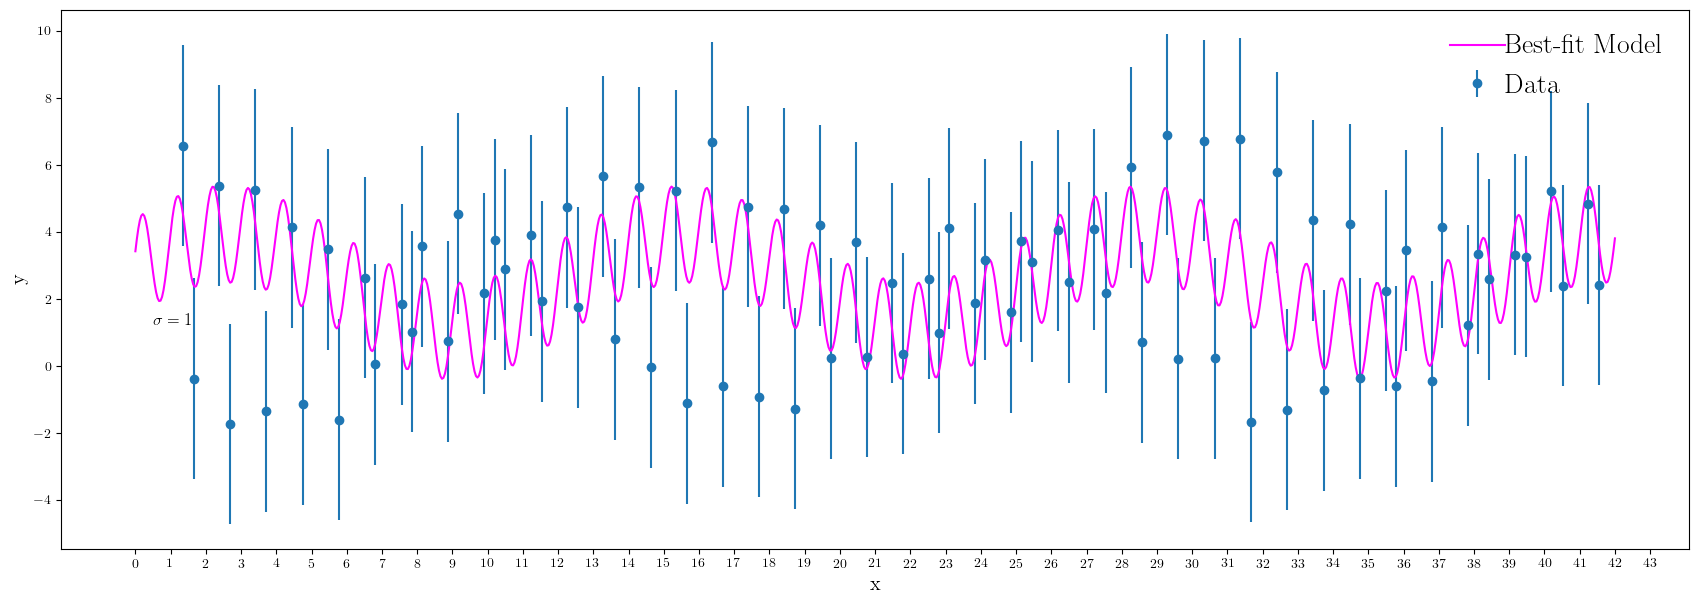

In [13]:
matplotlib.rcParams['font.family'] = ['Family1','serif','Family2']
matplotlib.rcParams['text.usetex'] = 'True'

f,ax = plt.subplots(1,1,figsize=(21,7))
for tick in ax.xaxis.get_ticklabels():
    tick.set_fontsize(10)
for tick in ax.yaxis.get_ticklabels():
    tick.set_fontsize(10)
ax.errorbar(xarr,yarr,y_err,fmt='o',label='Data')
ax.plot(x_model,y_model,color='magenta',label='Best-fit Model')
plt.xticks(np.arange(0, 44, 1))
plt.savefig("groupProject.jpg",bbox_inches="tight",facecolor="white")
ax.text(0.5,1.2,r'$\sigma = 1$',color='0', fontsize=12)
ax.set_xlabel('x',fontsize=15)
ax.set_ylabel('y',fontsize=15)
plt.legend(frameon=False,fontsize=20,handletextpad=0)

# 3) Next, have your notebook subtract off the best fit function from the data and plot the residuals. Assess graphically and mathematically deviations of the measured tidal data from the model. Plot a histogram of the residuals and measure the standard deviation. Is the scatter in the data larger than the assumed experimental error? Estimate the intrinsic scatter in the data after accounting for the assumed measurement error. Save the histogram as a PDF using our histogram best practices, including labeling of the data, axis labels, and "reasonable" bin widths as demonstrated in class.
The Scatter of the data is larger than the experimental error because on days 2 and 3 the error bar does not touch the best fit graph. 

The standard deviation of the residual is 1.6961361169815063
Mean Residual is -1.307230830192566.


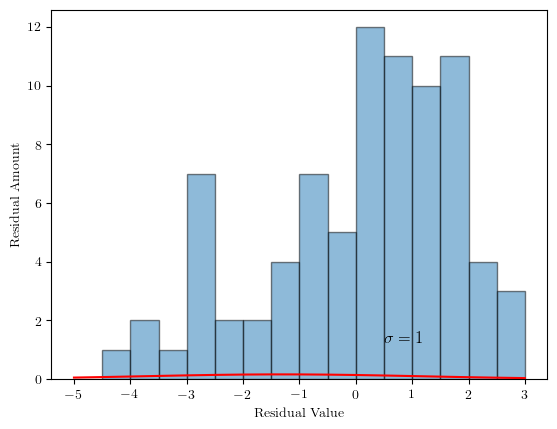

In [55]:

from scipy.stats import norm
residual_mean = np.mean(residuals)
residual_std = np.std(residuals)
def gaussian(x,mu,s):
    return 1./(2.*np.pi*s**2)**0.5 * np.exp(-0.5*((x-mu)/s)**2)
#3.) subtract off the best fit function from the data and plot the residuals.
points = sinusoidal_model(xarr)
difference = yarr - points
# -----------Histogram------------------
width = 0.5
histmin = np.floor(min(difference))
histmax = np.ceil(max(difference)) + width
bins = np.arange(histmin, histmax, width)
plt.hist(difference, bins = bins, alpha = 0.5, edgecolor = "black")
plt.ylabel("Residual Amount")
plt.xlabel("Residual Value")
print(f"The standard deviation of the residual is {np.std(difference)}")
print(f'Mean Residual is {np.mean(residuals)}.')
#----------------------------------------------------------
x_g = np.arange(-10, 20, 0.01)
plt.plot(bins,norm.pdf(bins, residual_mean, residual_std),color="red")
plt.text(0.5,1.2,r'$\sigma = 1$',color='0', fontsize=12)

#-------------------------- 

residuals = y_data - y_model
residuals = residuals.numpy()
plt.savefig('Question3.png') 

# 4) During the first high-tide of January 14, the tsunami from the underwater eruption of the Hunga Tonga-Hunga Ha'apai volcano reached the shores of Santa Cruz. The tsunami increased water levels near high tide by about 2ft. How large of a deviation is this tsunami, in terms of standard deviations of the distribution of normal tides from the model? Add a single 2ft outlier to the histogram of data and replot it as part of your Jupyter notebook.

The standard deviation of the residual is 1.863230265374034
Mean Residual is -1.307230830192566.


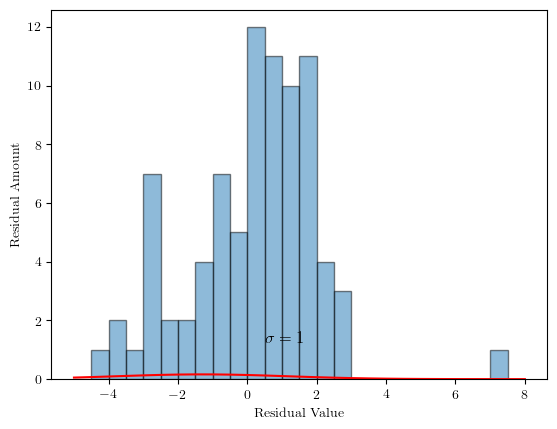

In [56]:

#3.) subtract off the best fit function from the data and plot the residuals.
points = sinusoidal_model(xarr)
difference = yarr - points
difference = np.append(difference, 7.33)

# -----------Histogram------------------
width = 0.5
histmin = np.floor(min(difference))
histmax = np.ceil(max(difference)) + width
bins = np.arange(histmin, histmax, width)
plt.hist(difference, bins = bins, alpha = 0.5, edgecolor = "black")
plt.ylabel("Residual Amount")
plt.xlabel("Residual Value")
print(f"The standard deviation of the residual is {np.std(difference)}")
print(f'Mean Residual is {np.mean(residuals)}.')
#----------------------------------------------------------
x_g = np.arange(-10, 20, 0.01)
plt.plot(bins,norm.pdf(bins, residual_mean, residual_std),color="red")
plt.text(0.5,1.2,r'$\sigma = 1$',color='0', fontsize=12)

#-------------------------- 

residuals = y_data - y_model
residuals = residuals.numpy()
plt.savefig('Question4.png') 